In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

Load Data

In [3]:
def get_label_from_image_name(image_name):
    value = image_name.split(".")[0]
    label = re.sub("\d+", "", value)
    if label == "Angry":
      return 0
    elif label == "Disgust":
      return 1
    elif label == "Fear":
      return 2
    elif label == "Happiness":
      return 3
    elif label == "Sadness":
      return 4
    elif label == "Surprise":
      return 5
    return -1

def predicted_class(index):
  if index == 0:
    return "angry"
  elif index == 1:
    return "disgust"
  elif index == 2:
    return "fear"
  elif index == 3:
    return "happiness"
  elif index == 4:
    return "sadness"
  elif index == 5:
    return "surprise"
  return -1


def totalLengthImages(): # Toplam fotoğraf sayısını return ediyor.
  total = 0
  emotion_list = ["Angry","Disgust","Fear","Happiness","Sadness","Surprise"]
  for emotion in emotion_list:
    path = f"/content/drive/MyDrive/emotion analysis/emotion-analysis-from-face-photos-main/images/{emotion}/"
    image_list = os.listdir(path)
    total += len(image_list)
  return total

BU PROCESS SADECE RGB RENKLERİNİ ÖN İŞLEMEK İÇİN TASARLANMIŞTIR.

In [4]:
def process():
  
  image_size = (32,32)
  num_images = totalLengthImages() # almak istediğimiz fotoğraf sayısı. 3558 fotoğraf

  images = np.zeros((num_images, 3, *image_size)) # fotoğrafları tutacağımız numpy array'i

  labels = np.empty(num_images, dtype=np.object) # labelları tutacağız.
  # Klasördeki resimlerin listesini alın ve ilk 100'ünü seçin (test amaçlı).
  emotion_list = ["Angry","Disgust","Fear","Happiness","Sadness","Surprise"]
  temp_value = 0
  for emotion in emotion_list:
    path = f"/content/drive/MyDrive/emotion analysis/emotion-analysis-from-face-photos-main/images/{emotion}/"
    image_list = os.listdir(path)
    for i, image_name in enumerate(image_list):
      # Resim yolu
      image_path = os.path.join(path, image_name)
      # Resmi yükleme ve boyutlandırma
      try:
        with Image.open(image_path) as img:
            img = img.resize(image_size) # 32,32 olacak şekilde fotoğrafı ayarlıyorum.
            img = np.array(img) #fotoğraf numpy array'ine çevriliyor.
        # Resim normalize etme
        img = img / 255.0 # fotoğrafı scale ediyorum.
        # Resmi NumPy dizisine ekleme
        if type(img) == None:
          continue
        images[temp_value + i] = np.transpose(img, (2, 0, 1))
        # Resmin sınıfını etiket olarak belirleme
        labels[temp_value + i] = get_label_from_image_name(emotion)
      except Exception as error:
        print(f"Hata: {error}")
        print(f"Resim yüklenemedi: {image_path}")
    temp_value += len(image_list) 
    print(temp_value)
  mask = np.logical_not(np.equal(labels, None))
  labels = labels[mask]
  images = np.transpose(images, (0, 2, 3, 1))
  images = np.array(images, dtype=float)
  labels = np.array(labels, dtype=int)
  return images, labels

In [5]:
def process2():
  
  image_size = (32,32)
  num_images = totalLengthImages() # almak istediğimiz fotoğraf sayısı. 3558 fotoğraf

  images = np.zeros((num_images, 3,*image_size)) # fotoğrafları tutacağımız numpy array'i

  labels = np.empty(num_images, dtype=np.object) # labelları tutacağız.
  # Klasördeki resimlerin listesini alın ve ilk 100'ünü seçin (test amaçlı).
  emotion_list = ["Angry","Disgust","Fear","Happiness","Sadness","Surprise"]
  temp_value = 0
  for emotion in emotion_list:
    path = f"/content/drive/MyDrive/emotion analysis/emotion-analysis-from-face-photos-main/images/{emotion}/"
    image_list = os.listdir(path)
    for i, image_name in enumerate(image_list):
      # Resim yolu
      image_path = os.path.join(path, image_name)
      # Resmi yükleme ve boyutlandırma
      try:
        with Image.open(image_path) as img:
            img = img.resize(image_size) # 32,32 olacak şekilde fotoğrafı ayarlıyorum.
            if img.mode == "RGB":
              img = np.array(img) #fotoğraf numpy array'ine çevriliyor.
            elif img.mode == "L":
              img = np.array(img)[:, :, np.newaxis]
              img = np.repeat(img, 3, axis=2)
        # Resim normalize etme
        img = img / 255.0 # fotoğrafı scale ediyorum.
        # Resmi NumPy dizisine ekleme
        if type(img) == None:
          continue
        images[temp_value + i] = np.transpose(img, (2, 0, 1))
        # Resmin sınıfını etiket olarak belirleme
        labels[temp_value + i] = get_label_from_image_name(emotion)
      except Exception as error:
        print(f"Hata: {error}")
        print(f"Resim yüklenemedi: {image_path}")
    temp_value += len(image_list) 
    print(temp_value)
  mask = np.logical_not(np.equal(labels, None))
  labels = labels[mask]
  images = np.transpose(images, (0, 2, 3, 1))
  images = np.array(images, dtype=float)
  labels = np.array(labels, dtype=int)
  return images, labels

In [6]:
def totalLengthTestImages(): # Toplam fotoğraf sayısını return ediyor. 600
  total = 0
  emotion_list = ["Angry","Disgust","Fear","Happiness","Sadness","Surprise"]
  for emotion in emotion_list:
    path = f"/content/drive/MyDrive/emotion analysis/emotion-analysis-from-face-photos-main/test/{emotion}/"
    image_list = os.listdir(path)
    total += len(image_list)
  return total

In [7]:
def getTestValues():
  image_size = (32,32)
  num_images = totalLengthTestImages() # almak istediğimiz fotoğraf sayısı. 3558 fotoğraf

  images = np.zeros((num_images, 3,*image_size)) # fotoğrafları tutacağımız numpy array'i

  labels = np.empty(num_images, dtype=np.object) # labelları tutacağız.
  emotion_list = ["Angry","Disgust","Fear","Happiness","Sadness","Surprise"]
  temp_value = 0
  for emotion in emotion_list:
    path = f"/content/drive/MyDrive/emotion analysis/emotion-analysis-from-face-photos-main/test/{emotion}/"
    image_list = os.listdir(path)
    for i, image_name in enumerate(image_list):
      # Resim yolu
      image_path = os.path.join(path, image_name)
      # Resmi yükleme ve boyutlandırma
      try:
        with Image.open(image_path) as img:
            img = img.resize(image_size) # 32,32 olacak şekilde fotoğrafı ayarlıyorum.
            if img.mode == "RGB":
              img = np.array(img) #fotoğraf numpy array'ine çevriliyor.
            elif img.mode == "L":
              img = np.array(img)[:, :, np.newaxis]
              img = np.repeat(img, 3, axis=2)
        # Resim normalize etme
        img = img / 255.0 # fotoğrafı scale ediyorum.
        # Resmi NumPy dizisine ekleme
        if type(img) == None:
          continue
        images[temp_value + i] = np.transpose(img, (2, 0, 1))
        # Resmin sınıfını etiket olarak belirleme
        labels[temp_value + i] = get_label_from_image_name(emotion)
      except Exception as error:
        print(f"Hata: {error}")
        print(f"Resim yüklenemedi: {image_path}")
    temp_value += len(image_list) 
    print(temp_value)
  mask = np.logical_not(np.equal(labels, None))
  labels = labels[mask]
  images = np.transpose(images, (0, 2, 3, 1))
  images = np.array(images, dtype=float)
  labels = np.array(labels, dtype=int)
  return images, labels

In [8]:
X,y = process2()

1000
2000
3000
4000
5000
6000


In [9]:
temp_list = list(y)
print(temp_list.count(0))
print(temp_list.count(1))
print(temp_list.count(2))
print(temp_list.count(3))
print(temp_list.count(4))
temp_list.count(5)

1000
1000
1000
1000
1000


1000

In [10]:
test_X, test_Y = getTestValues()

100
200
300
400
500
600


In [11]:
classes = ["Angry","Disgust","Fear","Happiness","Sadness","Surprise"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

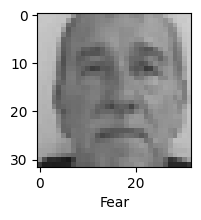

In [13]:
plot_sample(X, y, 2500)

In [14]:
# from sklearn.model_selection import train_test_split  
# X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), # image_size ile input_shape uyuşmak zorunda.
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax') # 6 adet sınıfım olduğu için 6 yazıyorum. Label sayısı kadar output hazırlanır.
])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # 0,1,2,3,4,5 gibi sınıflandırma yapmamızı sağlıyor.
              metrics=['accuracy'])

In [17]:
# cnn.fit(X_train, y_train, epochs=20, validation_data = (X_test, y_test))
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
188/188 [==============================] - 11s 5ms/step - loss: 1.5712 - accuracy: 0.3747
Epoch 2/20
188/188 [==============================] - 1s 5ms/step - loss: 1.2522 - accuracy: 0.5193
Epoch 3/20
188/188 [==============================] - 1s 5ms/step - loss: 1.1296 - accuracy: 0.5632
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 1.0181 - accuracy: 0.6068
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.9206 - accuracy: 0.6502
Epoch 6/20
188/188 [==============================] - 1s 5ms/step - loss: 0.8386 - accuracy: 0.6885
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.7643 - accuracy: 0.7130
Epoch 8/20
188/188 [==============================] - 1s 5ms/step - loss: 0.6924 - accuracy: 0.7487
Epoch 9/20
188/188 [==============================] - 1s 6ms/step - loss: 0.6276 - accuracy: 0.7772
Epoch 10/20
188/188 [==============================] - 1s 6ms/step - loss: 0.5608 - accuracy: 0.798

In [18]:
test_X, test_Y

(array([[[[0.22352941, 0.16078431, 0.1254902 ],
          [0.17647059, 0.12941176, 0.09803922],
          [0.13333333, 0.09803922, 0.0745098 ],
          ...,
          [0.16078431, 0.11372549, 0.09019608],
          [0.17647059, 0.1372549 , 0.12941176],
          [0.18823529, 0.1372549 , 0.11372549]],
 
         [[0.21960784, 0.14901961, 0.12156863],
          [0.17254902, 0.11372549, 0.08627451],
          [0.13333333, 0.08627451, 0.0627451 ],
          ...,
          [0.17647059, 0.1254902 , 0.10196078],
          [0.16470588, 0.1254902 , 0.11764706],
          [0.19607843, 0.14509804, 0.12156863]],
 
         [[0.19607843, 0.12156863, 0.09411765],
          [0.16078431, 0.09803922, 0.0745098 ],
          [0.14117647, 0.09019608, 0.06666667],
          ...,
          [0.1254902 , 0.0745098 , 0.05098039],
          [0.16862745, 0.1254902 , 0.11764706],
          [0.2       , 0.14509804, 0.12941176]],
 
         ...,
 
         [[0.0745098 , 0.07843137, 0.06666667],
          [0.07843

In [19]:
true = 0
for i in range(len(test_X)):
  image = test_X[i]
  image = np.expand_dims(image, axis=0)
  prediction = model.predict(image)
  index = np.argmax(prediction) 
  # print("Gerçek:",classes[test_Y[i]])
  # print("Tahmin:",classes[index])
  if(test_Y[i] == index):
    true += 1

1/1 [==============================] - 0s 32ms/step


In [20]:
true

398

angry     -> 0
disgust   -> 1
fear      -> 2
happiness -> 3
sadness   -> 4
surprise  -> 5